In [2]:
df = pd.read_csv(
    r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\afcon_2025_2026_dataset.csv",
    engine="python",
    on_bad_lines="skip"
)


In [3]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("-", "_")
)


In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [6]:
df.columns.tolist()


['date',
 'team1',
 'team2',
 'score_team1___team2',
 'fulltimeresult',
 'venue',
 'city',
 'attendance',
 'goal_scorers_team_1',
 'goal_scorers_team_2',
 'team_1_possession_percentage',
 'team_2_possession_percentage',
 'team_1_shots_on_goal',
 'team_2_shots_on_goal',
 'team_1_shot_attempts',
 'team_2_shot_attempts',
 'team_1_yellow_cards',
 'team_2_yellow_cards',
 'team_1_corner_kicks',
 'team_2_corner_kicks',
 'team_1_saves',
 'team_2_saves']

In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("-", "_")
)


In [8]:
numeric_cols = [
    'attendance',
    'team_1_possession_percentage','team_2_possession_percentage',
    'team_1_shots_on_goal','team_2_shots_on_goal',
    'team_1_shot_attempts','team_2_shot_attempts',
    'team_1_yellow_cards','team_2_yellow_cards',
    'team_1_corner_kicks','team_2_corner_kicks',
    'team_1_saves','team_2_saves'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [9]:
df[['team_1_goals', 'team_2_goals']] = (
    df['score_team1___team2']
    .str.split('-', expand=True)
    .apply(lambda x: x.str.strip())
    .astype(float)
)


In [10]:
df['goal_difference'] = df['team_1_goals'] - df['team_2_goals']


In [12]:
df['team_1_total_shots'] = df['team_1_shots_on_goal'] + df['team_1_shot_attempts']
df['team_2_total_shots'] = df['team_2_shots_on_goal'] + df['team_2_shot_attempts']


In [14]:
df['team_1_conversion_rate'] = df['team_1_goals'] / df['team_1_total_shots']


In [15]:
df['team_1_result'] = df.apply(
    lambda row: 'Win' if row['team_1_goals'] > row['team_2_goals']
    else 'Loss' if row['team_1_goals'] < row['team_2_goals']
    else 'Draw',
    axis=1
)


In [16]:
df.head()

,date,team1,team2,score_team1___team2,fulltimeresult,venue,city,attendance,goal_scorers_team_1,goal_scorers_team_2,...,team_2_corner_kicks,team_1_saves,team_2_saves,team_1_goals,team_2_goals,goal_difference,team_1_result,team_1_total_shots,team_2_total_shots,team_1_conversion_rate
0,2025-12-22,Morocco,Comoros,2 - 0,FT,Stade Prince Moulay Abdallah,Rabat,60180,Brahim Díaz - 55'Ayoub El Kaabi - 74',NaN,...,0,2,5,2.0,0.0,2.0,Win,23,6,0.086957
1,2025-12-22,Mali,Zambia,1 - 1,FT,Mohamed V Stadium,Casablanca,10124,Lassine Sinayoko - 61',Patson Daka - 90'+2',...,5,1,4,1.0,1.0,0.0,Draw,20,9,0.050000
2,2025-12-22,South Africa,Angola,2 - 1,FT,Stade de Marrakech,Marrakech,4013,Oswin Appollis - 21'Lyle Foster - 79',Show - 35’,...,9,3,2,2.0,1.0,1.0,Win,14,14,0.142857
3,2025-12-23,Egypt,Zimbabwe,2 - 1,FT,Le Grand Stade Agadir,Agadir,28199,Omar Marmoush - 64'Mohamed Salah - 90'+1',Prince Dube - 20',...,3,2,9,2.0,1.0,1.0,Win,46,11,0.043478
4,2025-12-23,Congo DR,Benin,1 - 0,FT,Stade El Barid,Rabat,13073,Théo Bongonda - 16'\r\n\r\n\r\n,NaN,...,5,2,2,1.0,0.0,1.0,Win,14,14,0.071429


In [17]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          49 non-null     datetime64[ns]
 1   team1                         49 non-null     object        
 2   team2                         49 non-null     object        
 3   score_team1___team2           49 non-null     object        
 4   fulltimeresult                49 non-null     object        
 5   venue                         49 non-null     object        
 6   city                          49 non-null     object        
 7   attendance                    49 non-null     int64         
 8   goal_scorers_team_1           37 non-null     object        
 9   goal_scorers_team_2           33 non-null     object        
 10  team_1_possession_percentage  49 non-null     float64       
 11  team_2_possession_percentage  49 n

,date,attendance,team_1_possession_percentage,team_2_possession_percentage,team_1_shots_on_goal,team_2_shots_on_goal,team_1_shot_attempts,team_2_shot_attempts,team_1_yellow_cards,team_2_yellow_cards,team_1_corner_kicks,team_2_corner_kicks,team_1_saves,team_2_saves,team_1_goals,team_2_goals,goal_difference,team_1_total_shots,team_2_total_shots,team_1_conversion_rate
count,49,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000,49.000000
mean,2025-12-30 22:02:26.938775552,26557.448980,51.751020,47.657143,4.326531,3.22449,12.224490,10.510204,2.122449,2.020408,4.836735,4.244898,2.265306,3.061224,1.244898,1.000000,0.244898,16.55102,13.734694,0.071034
min,2025-12-22 00:00:00,4013.000000,27.000000,22.500000,0.000000,0.00000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,3.00000,4.000000,0.000000
25%,2025-12-26 00:00:00,11444.000000,43.200000,40.000000,2.000000,2.00000,9.000000,6.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,11.00000,8.000000,0.043478
50%,2025-12-29 00:00:00,18837.000000,52.900000,47.100000,4.000000,3.00000,12.000000,10.000000,2.000000,2.000000,5.000000,4.000000,2.000000,2.000000,1.000000,1.000000,0.000000,16.00000,13.000000,0.062500
75%,2026-01-04 00:00:00,35200.000000,59.100000,56.000000,6.000000,4.00000,15.000000,13.000000,3.000000,3.000000,6.000000,6.000000,3.000000,4.000000,2.000000,2.000000,1.000000,21.00000,17.000000,0.111111
max,2026-01-19 00:00:00,66526.000000,77.500000,72.000000,17.000000,9.00000,35.000000,21.000000,5.000000,8.000000,11.000000,11.000000,7.000000,14.000000,3.000000,3.000000,3.000000,46.00000,28.000000,0.300000
std,NaN,18949.549364,12.075321,12.058296,3.268459,2.07430,5.969594,5.000510,1.348342,1.600648,2.392235,2.586267,1.655490,2.680238,1.010994,1.020621,1.422009,8.77511,6.651364,0.060572


In [18]:
df.isna().sum()


date                             0
team1                            0
team2                            0
score_team1___team2              0
fulltimeresult                   0
venue                            0
city                             0
attendance                       0
goal_scorers_team_1             12
goal_scorers_team_2             16
team_1_possession_percentage     0
team_2_possession_percentage     0
team_1_shots_on_goal             0
team_2_shots_on_goal             0
team_1_shot_attempts             0
team_2_shot_attempts             0
team_1_yellow_cards              0
team_2_yellow_cards              0
team_1_corner_kicks              0
team_2_corner_kicks              0
team_1_saves                     0
team_2_saves                     0
team_1_goals                     0
team_2_goals                     0
goal_difference                  0
team_1_result                    0
team_1_total_shots               0
team_2_total_shots               0
team_1_conversion_ra

array([[<Axes: title={'center': 'team_1_goals'}>,
        <Axes: title={'center': 'team_2_goals'}>]], dtype=object)

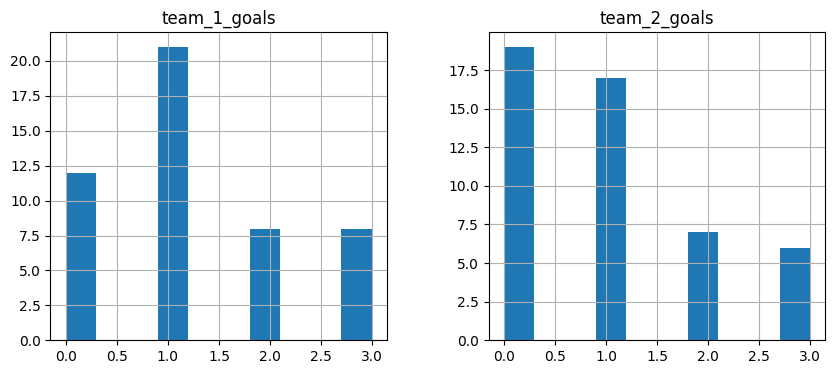

In [20]:
df[['team_1_goals', 'team_2_goals']].hist(bins=10, figsize=(10,4))


In [21]:
df['team_1_goals'].mean(), df['team_2_goals'].mean()


(np.float64(1.2448979591836735), np.float64(1.0))

In [23]:
goals_team1 = df.groupby('team1')['team_1_goals'].sum()
goals_team2 = df.groupby('team2')['team_2_goals'].sum()

total_goals = goals_team1.add(goals_team2, fill_value=0).sort_values(ascending=False)
total_goals.head(10)


Senegal         13.0
Ivory Coast     10.0
Egypt            9.0
Morocco          9.0
Algeria          8.0
Tunisia          7.0
Nigeria          7.0
Cameroon         6.0
South Africa     6.0
Zimbabwe         4.0
dtype: float64

In [27]:
[col for col in df.columns if "conversion" in col]


['team_1_conversion_rate']

In [28]:
df['team_2_conversion_rate'] = df['team_2_goals'] / df['team_2_total_shots']


In [29]:
[col for col in df.columns if "conversion" in col]


['team_1_conversion_rate', 'team_2_conversion_rate']

array([[<Axes: title={'center': 'team_1_conversion_rate'}>,
        <Axes: title={'center': 'team_2_conversion_rate'}>]], dtype=object)

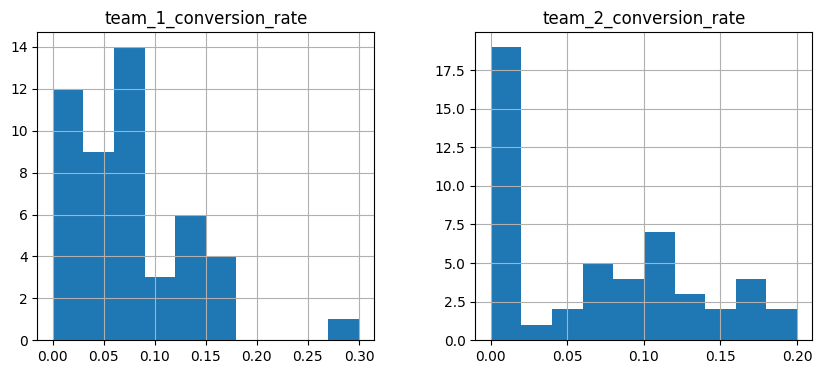

In [30]:
df[['team_1_conversion_rate', 'team_2_conversion_rate']].hist(bins=10, figsize=(10,4))


In [31]:
eff1 = df.groupby('team1')['team_1_conversion_rate'].mean()
eff2 = df.groupby('team2')['team_2_conversion_rate'].mean()

eff_total = eff1.add(eff2, fill_value=0).sort_values(ascending=False)
eff_total.head(10)


Tunisia              0.270798
Zimbabwe             0.223110
Equatorial Guinea    0.205128
Algeria              0.202633
Ivory Coast          0.195405
Senegal              0.187998
Tanzania             0.174451
Mozambique           0.166667
South Africa         0.154156
Uganda               0.150000
dtype: float64

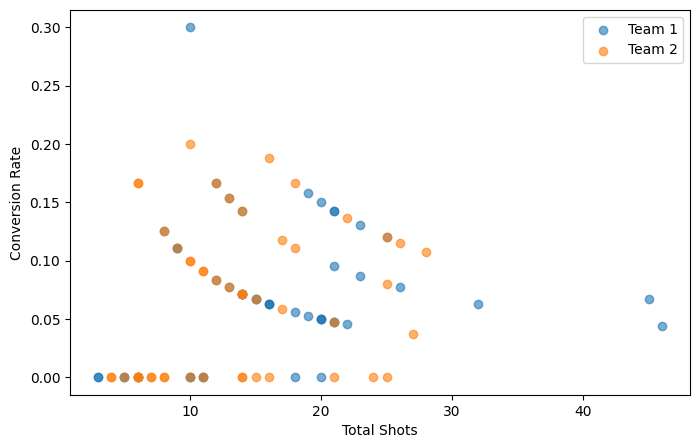

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['team_1_total_shots'], df['team_1_conversion_rate'], alpha=0.6, label='Team 1')
plt.scatter(df['team_2_total_shots'], df['team_2_conversion_rate'], alpha=0.6, label='Team 2')
plt.xlabel("Total Shots")
plt.ylabel("Conversion Rate")
plt.legend()
plt.show()


In [33]:
df.to_csv(r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\cleaned_afcon_2025_2026.csv", index=False)


In [34]:
df.head(30).to_csv(
    r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\cleaned_afcon_2025_2026_first30.csv",
    index=False
)
